In [1]:
import cv2
import tensorflow as tf
import h5py
import numpy as np
import imageio
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0) # set default size of plots
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

%load_ext autoreload
%autoreload 2

In [13]:
%reload_ext autoreload

from sketch2code.data_model import *
from sketch2code.datasets import *
from sketch2code.helpers import *
from sketch2code.methods.rl_env import *
from sketch2code.methods.dqn import *

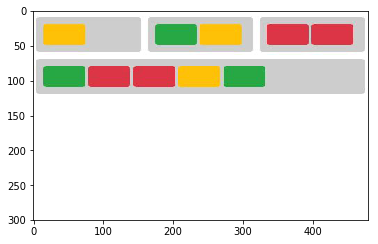

In [5]:
tags, images = load_dataset("toy")
images = norm_rgb_imgs(images[:])
plt.imshow(1 - images[0])

In [6]:
env_creator = EnvCreator(tags, images, shrink_factor=0.5)

In [7]:
envs = env_creator.create()

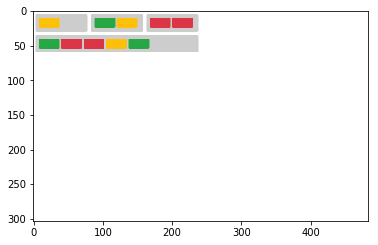

In [8]:
plt.imshow(1 - envs[0].render())

# Train DQN

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

n_actions = len(env_creator.actions)

In [14]:
update_q = DQN(300, 480, n_actions).to(device)
target_q = DQN(300, 480, n_actions).to(device)
target_q.load_state_dict(update_q.state_dict())
target_q.eval()

DQN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 32, kernel_size=(5, 5), stride=(2, 2))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=62016, out_features=15, bias=True)
)

In [15]:
device

device(type='cuda')

In [ ]:
optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)